# Project: Factors affecting patients' attendance to medical appointments

## Table of Contents
- Introduction
- Data Wrangling
- Exploratory Data Analysis
- Conclusions

# Introduction

This [dataset](https://www.google.com/url?q=https%3A%2F%2Fd17h27t6h515a5.cloudfront.net%2Ftopher%2F2017%2FOctober%2F59dd2e9a_noshowappointments-kagglev2-may-2016%2Fnoshowappointments-kagglev2-may-2016.csv&sa=D&source=docs) contains information about patients in Brazil, in the year 2016, who have scheduled medical appointments. The data collected indicates patient attendance or absence, presence or absence of comorbidities and their biodata.

### Questions

The following are questions to be explored in this analysis:

1. Do younger patients show up to appointments more frequently than older patients?
2. Do handicapped patients meet more appointments than they miss them?
3. Does the distribution of SMS have an effect on appointment attendance?
4. Does access to welfare aid (scholarship) affect appointment attendance?

# Data Wrangling

The process begins by importing the required libraries and loading the dataset for analysis;

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
apt_df=pd.read_csv('noshowappointments.csv')
apt_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Cleaning

To return the dimensions of the dataset above, we use:

In [55]:
apt_df.shape

(110527, 14)

The shape shows that there are 110527 rows and 14 columns in the original dataset. To get more information about this dataset;

In [56]:
apt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


There are no missing values in this dataset.

To find the number of unique values in this dataset;

In [57]:
apt_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Next, columns that are not required for the analysis of this dataset are removed. The appointment ID, scheduled day and appointment day are not required so they are dropped.

In [58]:
apt_df.drop(columns=['AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
apt_df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Next, rename the column headers that are misspelled.

In [59]:
apt_df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicapped','No-show':'No_show'},inplace=True)
apt_df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


To capitalise the first letter of each word in the "Neighbourhood" column;

In [60]:
def clean_col (df, col):
    """capitalises the first letter of values in a column
    @param df:  A dataframe
    @param col: A series object and column in a df
    @return: None, cleans in place"""
    for N in apt_df:
        df[col]=df[col].str.title()

In [61]:
clean_col(apt_df,'Neighbourhood')

In [62]:
apt_df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
0,2.987250e+13,F,62,Jardim Da Penha,0,1,0,0,0,0,No
1,5.589978e+14,M,56,Jardim Da Penha,0,0,0,0,0,0,No
2,4.262962e+12,F,62,Mata Da Praia,0,0,0,0,0,0,No
3,8.679512e+11,F,8,Pontal De Camburi,0,0,0,0,0,0,No
4,8.841186e+12,F,56,Jardim Da Penha,0,1,1,0,0,0,No


To confirm the presence of duplicates in the dataset, check for the count of duplicates.

In [63]:
sum(apt_df.duplicated())

27964

There are 27964 duplicates in this dataset. To discover the duplicate rows;

In [64]:
apt_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523     True
110524    False
110525     True
110526     True
Length: 110527, dtype: bool

This method returns 'True' for every duplicate row, else, it returns 'False'. To drop duplicates;

In [65]:
apt_df.drop_duplicates(inplace=True)
apt_df.head(10)

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
0,2.987250e+13,F,62,Jardim Da Penha,0,1,0,0,0,0,No
1,5.589978e+14,M,56,Jardim Da Penha,0,0,0,0,0,0,No
2,4.262962e+12,F,62,Mata Da Praia,0,0,0,0,0,0,No
3,8.679512e+11,F,8,Pontal De Camburi,0,0,0,0,0,0,No
4,8.841186e+12,F,56,Jardim Da Penha,0,1,1,0,0,0,No
5,9.598513e+13,F,76,República,0,1,0,0,0,0,No
6,7.336882e+14,F,23,Goiabeiras,0,0,0,0,0,0,Yes
7,3.449833e+12,F,39,Goiabeiras,0,0,0,0,0,0,Yes
8,5.639473e+13,F,21,Andorinhas,0,0,0,0,0,0,No
9,7.812456e+13,F,19,Conquista,0,0,0,0,0,0,No


To confirm that duplicates were dropped;

In [66]:
sum(apt_df.duplicated())

0

This shows that there are no longer duplicates in the dataset. To get the summary of the edited dataframe;

In [67]:
apt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82563 entries, 0 to 110524
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientId      82563 non-null  float64
 1   Gender         82563 non-null  object 
 2   Age            82563 non-null  int64  
 3   Neighbourhood  82563 non-null  object 
 4   Scholarship    82563 non-null  int64  
 5   Hypertension   82563 non-null  int64  
 6   Diabetes       82563 non-null  int64  
 7   Alcoholism     82563 non-null  int64  
 8   Handicapped    82563 non-null  int64  
 9   SMS_received   82563 non-null  int64  
 10  No_show        82563 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 6.6+ MB


To describe the dataset;

In [68]:
apt_df['Age'].describe()

count    82563.000000
mean        36.715684
std         23.234765
min         -1.000000
25%         17.000000
50%         36.000000
75%         55.000000
max        115.000000
Name: Age, dtype: float64

The statistical details of the dataset shows that the minimum age is -1 which might be an incorrect value. To show how often it repeats in the dataset;

In [69]:
apt_df.groupby(['Age']).count()

,PatientId,Gender,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
Age,,,,,,,,,,
-1,1,1,1,1,1,1,1,1,1,1
0,2666,2666,2666,2666,2666,2666,2666,2666,2666,2666
1,1798,1798,1798,1798,1798,1798,1798,1798,1798,1798
2,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
3,1193,1193,1193,1193,1193,1193,1193,1193,1193,1193
...,...,...,...,...,...,...,...,...,...,...
98,5,5,5,5,5,5,5,5,5,5
99,1,1,1,1,1,1,1,1,1,1
100,3,3,3,3,3,3,3,3,3,3


To find the row;

In [70]:
print(apt_df.loc[apt_df['Age'] == -1])

          PatientId Gender  Age Neighbourhood  Scholarship  Hypertension  \
99832  4.659432e+14      F   -1         Romão            0             0   

       Diabetes  Alcoholism  Handicapped  SMS_received No_show  
99832         0           0            0             0      No  


To drop the -1 value;

In [71]:
apt_df.drop(index=99832, axis=0, inplace=True)

In [72]:
apt_df['Age'].describe()

count    82562.000000
mean        36.716141
std         23.234535
min          0.000000
25%         17.000000
50%         36.000000
75%         55.000000
max        115.000000
Name: Age, dtype: float64

From the dataset above, the minimum age is 0 and the maximum is 115. The mean age is 37. The maximum number of handicapped is 4 and 1 each for people on scholarship, living with diabetes, hypertension, have an alcoholism problem and received an SMS.

It is necessary to change the datatype of the "Age" column from float to integer. This will come in handy during exploratory analysis

In [73]:
apt_df['Age'] = apt_df['Age'].astype(int)
apt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82562 entries, 0 to 110524
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientId      82562 non-null  float64
 1   Gender         82562 non-null  object 
 2   Age            82562 non-null  int32  
 3   Neighbourhood  82562 non-null  object 
 4   Scholarship    82562 non-null  int64  
 5   Hypertension   82562 non-null  int64  
 6   Diabetes       82562 non-null  int64  
 7   Alcoholism     82562 non-null  int64  
 8   Handicapped    82562 non-null  int64  
 9   SMS_received   82562 non-null  int64  
 10  No_show        82562 non-null  object 
dtypes: float64(1), int32(1), int64(6), object(3)
memory usage: 6.3+ MB


To group various ages into categories(as this will come in handy during exploration);

In [74]:
bin_edges=[0,40,60,115]
bin_names= ['Young', 'Middle Age','Old']
apt_df['Age_group'] =pd.cut(apt_df['Age'],bin_edges, labels = bin_names)

In [75]:
apt_df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show,Age_group
0,2.987250e+13,F,62,Jardim Da Penha,0,1,0,0,0,0,No,Old
1,5.589978e+14,M,56,Jardim Da Penha,0,0,0,0,0,0,No,Middle Age
2,4.262962e+12,F,62,Mata Da Praia,0,0,0,0,0,0,No,Old
3,8.679512e+11,F,8,Pontal De Camburi,0,0,0,0,0,0,No,Young
4,8.841186e+12,F,56,Jardim Da Penha,0,1,1,0,0,0,No,Middle Age


# Exploring with Visuals

To have a general look at the dataset,

In [76]:
def plot (df, col_list):
    """makes histograms
    @param df:  A dataframe
    @param col: A series object and column in a df
    @return: histogram"""
    for N in apt_df:
        col = col_list
        df[col]=df[col].plot.subplot2grid((2,4), (0,0))

In [77]:
col_list = ['PatientId','Age', 'Scholarship','Hypertension', 'Diabetes','Alcoholism','Handicapped','SMS_received']

In [78]:
plot(apt_df,col_list)

AttributeError: 'PlotAccessor' object has no attribute 'subplot2grid'

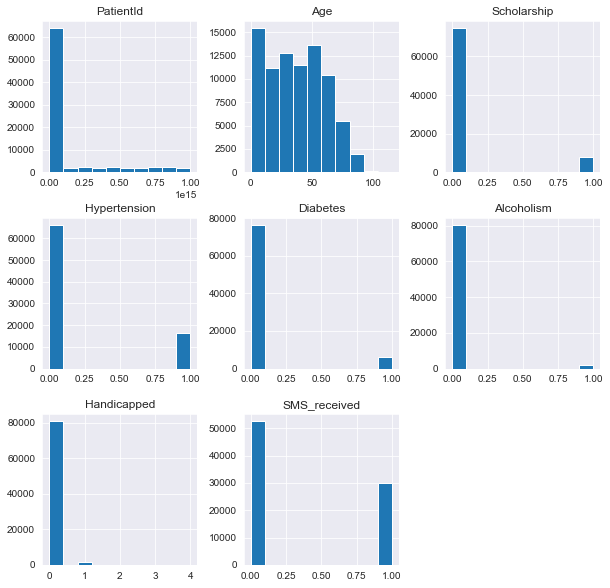

In [79]:
apt_df.hist(figsize =(10,10));

The "age" histogram above has the largest distribution. This distribution is said to be positively skewed as it shows a large number of occurences on the left (lower value cells).
The other parameters have occurences at both extremes of the chart, this shows that the values are either 0 or 1.
The histogram also shows that there are very few handicapped patients. Less than 40000 patients received an SMS, less than 10000 were on scholarship. About 20000 patients live with hypertension and less than 10000 with diabetes and alcoholism.

### Do younger patients show up to appointments more frequently?

To find the number of young patients in the dataset,

In [135]:
apt_df.Age_group.value_counts().Young

43235

The output shows us that there are 43235 occurrences of young people in the 'Age group' column.

<AxesSubplot:xlabel='count', ylabel='No_show'>

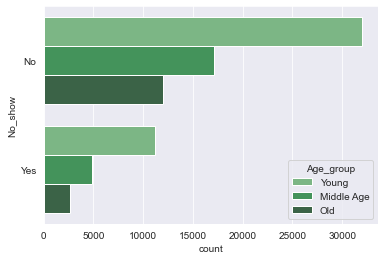

In [136]:
sns.countplot(y='No_show', hue='Age_group', data=apt_df, palette="Greens_d")

The graph above shows that young patients show up to appointments more frequently than other age groups. 

### Do handicapped patients meet more appointments than they miss them?

To answer the question, a function is created.

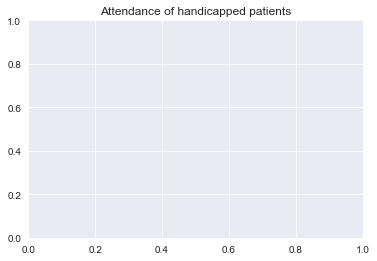

In [81]:
def bar_chart(x,y):
    """ To plot a bar chart using seaborn
    @param x : a series object
    @param y : a series object"""
    sns.set_style('darkgrid')
    sns.barplot(x = "No_show", y = "Handicapped", data = apt_df)
plt.title('Attendance of handicapped patients')
plt.show()

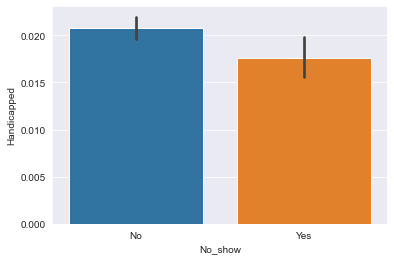

In [82]:
bar_chart(apt_df.No_show,apt_df.Handicapped)

The above bar chart shows that handicapped patients show up for their appointments more than they miss them.

# Conclusion

At the start of this analysis, a few questions were asked;
1. Do younger patients show up to appointments more frequently than older patients?
2. Do handicapped patients meet more appointments than they miss them?

During exploration, it was concluded that;

 1. Young patients showed up more frequently to their medical appointments as opposed to other age groups.
 2. Handicapped patients showed up to their appointments more than they missed them.

It was also noted from the histogram that fewer patients received an SMS and were on the welfare program (scholarship). These factors might have affected their presence or absence at appointments. 

## Limitations:
1. Other indicators might have played a role in patients' appearance to appointments however they were not available in this dataset
2. The format in which the data was collected made visual exploration difficult.
3. This data was collected in 2016 and should be updated for better analysis.

## References:
1. [Datatofish](https://datatofish.com/lowercase-pandas-dataframe/)
2. [Stackabuse](https://stackabuse.com/seaborn-bar-plot-tutorial-and-examples/)
3. [Stackoverflow](https://stackoverflow.com/questions/34251641/how-to-make-a-bar-plot-of-non-numerical-data-in-pandas)
4. [Geeksforgeeks](https://www.geeksforgeeks.org/pandas-groupby-multiple-values-and-plotting-results/)